In [1]:
import pathlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

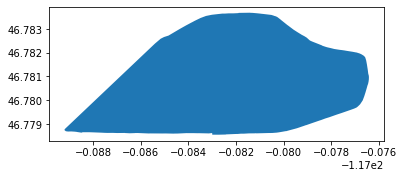

In [2]:
boundaryPath = pathlib.Path.cwd() / "input" / "cookeast_boundary_20190924.geojson"
ce_boundary = gpd.read_file(boundaryPath)
ce_boundary.crs = {"init": "epsg:4326"}
ce_boundary.plot()

In [3]:
inPath = pathlib.Path.cwd() / "working" / "cleaned_data_20200709_P2A1.csv"
df = pd.read_csv(inPath)
gdf = gpd.GeoDataFrame(
    df, geometry = gpd.points_from_xy(df.Longitude, df.Latitude)
).drop(["Latitude", "Longitude"], axis = 1)
gdf.crs = {"init": "epsg:4326"}

gdf.describe()

,ID2,Elevation,Slope,Aspect,TopographicWetnessIndex,RelativeSlopePosition,AnnualGlobalSolarRadiation,DepthFewRoots,DepthNoRoots,RelativeYieldCV,RelativeYieldMean,HasSoilDescription
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,169.000000,169.000000,369.000000,369.000000,369.000000
mean,189.059621,793.165348,6.407073,208.872987,5.993245,0.384599,1702.002084,71.964497,126.639053,0.209722,0.998983,0.495935
std,113.283200,8.495969,2.953958,112.762528,1.415197,0.250104,106.979637,29.576353,27.696375,0.075986,0.140639,0.500662
min,1.000000,773.507740,0.619535,1.262378,3.950007,0.000000,1453.579712,16.000000,47.000000,0.070753,0.514259,0.000000
25%,93.000000,787.553020,4.455482,158.379349,5.103765,0.208310,1626.670044,52.000000,109.000000,0.160471,0.915329,0.000000
50%,185.000000,792.010370,6.086912,215.560104,5.725208,0.344200,1683.815430,72.000000,128.000000,0.195218,1.022535,0.000000
75%,277.000000,798.202220,7.792976,306.389069,6.354430,0.534797,1809.005005,93.000000,153.000000,0.244780,1.097078,1.000000
max,425.000000,813.390000,15.676865,359.833557,14.157762,0.990449,1930.155518,153.000000,153.000000,0.588032,1.475118,1.000000


0.160470533721875

In [15]:
TWI_cutoff = gdf["TopographicWetnessIndex"].quantile(0.5)
AGSR_cutoff = gdf["AnnualGlobalSolarRadiation"].quantile(0.5)
RYCV_25percentile = gdf["RelativeYieldCV"].quantile(0.25)
RYCV_75percentile = gdf["RelativeYieldCV"].quantile(0.75)
Slope_cutoff = gdf["Slope"].quantile(0.5)

gdf_profile = gdf[gdf["HasSoilDescription"] > 0]

gdf_TWI = gdf_profile[(gdf_profile["TopographicWetnessIndex"] < TWI_cutoff)]
gdf_AGSR = gdf_profile[(gdf_profile["AnnualGlobalSolarRadiation"] > AGSR_cutoff)]
gdf_RYCV = gdf_profile[(gdf_profile["RelativeYieldCV"] < RYCV_75percentile) & (gdf_profile["RelativeYieldCV"] > RYCV_25percentile)]
gdf_slope = gdf_profile[(gdf_profile["Slope"] < Slope_cutoff)]

gdf_TWI_AGSR = gdf_profile[(gdf_profile["TopographicWetnessIndex"] < TWI_cutoff) & (gdf_profile["AnnualGlobalSolarRadiation"] > AGSR_cutoff)]
gdf_TWI_AGSR_RYCV = gdf_profile[(gdf_profile["TopographicWetnessIndex"] < TWI_cutoff) & (gdf_profile["AnnualGlobalSolarRadiation"] > AGSR_cutoff) & (gdf_profile["RelativeYieldCV"] < RYCV_75percentile) & (gdf_profile["RelativeYieldCV"] > RYCV_25percentile)]

gdf_TWI_Slope_RYCV = gdf_profile[(gdf_profile["TopographicWetnessIndex"] < TWI_cutoff) & (gdf_profile["Slope"] < Slope_cutoff) & (gdf_profile["RelativeYieldCV"] < RYCV_75percentile) & (gdf_profile["RelativeYieldCV"] > RYCV_25percentile)]

#gdf_filtered = gdf[gdf["RelativeSlopePosition"] > .35]
print("gdf_TWI: " + str(len(gdf_TWI)))
print("gdf_AGSR: " + str(len(gdf_AGSR)))
print("gdf_TWI_AGSR: " + str(len(gdf_TWI_AGSR)))
print("gdf_RYCV: " + str(len(gdf_RYCV)))
print("gdf_TWI_AGSR_RYCV: " + str(len(gdf_TWI_AGSR_RYCV)))
print("gdf_slope: " + str(len(gdf_slope)))
print("gdf_TWI_Slope_RYCV: " + str(len(gdf_TWI_Slope_RYCV)))

gdf_TWI: 94
gdf_AGSR: 88
gdf_TWI_AGSR: 41
gdf_RYCV: 90
gdf_TWI_AGSR_RYCV: 24
gdf_slope: 90
gdf_TWI_Slope_RYCV: 16


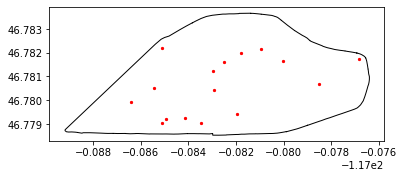

In [16]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_TWI_Slope_RYCV.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

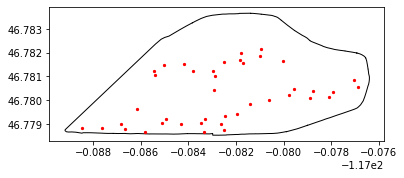

In [5]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_TWI_AGSR.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

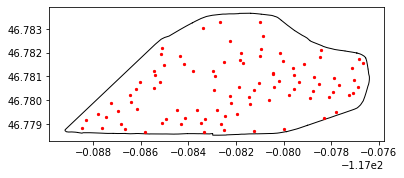

In [7]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_TWI.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

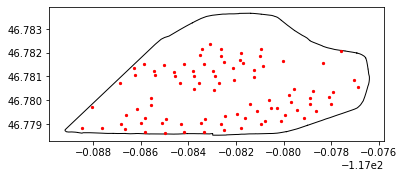

In [8]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_AGSR.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

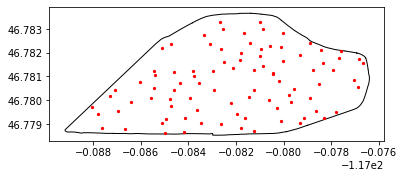

In [10]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_RYCV.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

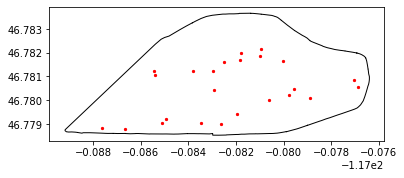

In [9]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ce_boundary.plot(ax = ax, color = "white", edgecolor="black")
gdf_TWI_AGSR_RYCV.plot(ax=ax, marker = "o", color = "red", markersize = 5)
plt.show()

In [10]:
gdf.describe()


,ID2,Elevation,Slope,Aspect,TopographicWetnessIndex,RelativeSlopePosition,AnnualGlobalSolarRadiation,DepthFewRoots,DepthNoRoots,RelativeYieldCV,RelativeYieldMean,HasSoilDescription
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,169.000000,169.000000,369.000000,369.000000,369.000000
mean,189.059621,793.165348,6.407073,208.872987,5.993245,0.384599,1702.002084,71.964497,126.639053,0.209722,0.998983,0.495935
std,113.283200,8.495969,2.953958,112.762528,1.415197,0.250104,106.979637,29.576353,27.696375,0.075986,0.140639,0.500662
min,1.000000,773.507740,0.619535,1.262378,3.950007,0.000000,1453.579712,16.000000,47.000000,0.070753,0.514259,0.000000
25%,93.000000,787.553020,4.455482,158.379349,5.103765,0.208310,1626.670044,52.000000,109.000000,0.160471,0.915329,0.000000
50%,185.000000,792.010370,6.086912,215.560104,5.725208,0.344200,1683.815430,72.000000,128.000000,0.195218,1.022535,0.000000
75%,277.000000,798.202220,7.792976,306.389069,6.354430,0.534797,1809.005005,93.000000,153.000000,0.244780,1.097078,1.000000
max,425.000000,813.390000,15.676865,359.833557,14.157762,0.990449,1930.155518,153.000000,153.000000,0.588032,1.475118,1.000000


In [11]:
gdf_TWI_AGSR_RYCV.describe()

,ID2,Elevation,Slope,Aspect,TopographicWetnessIndex,RelativeSlopePosition,AnnualGlobalSolarRadiation,DepthFewRoots,DepthNoRoots,RelativeYieldCV,RelativeYieldMean,HasSoilDescription
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,22.000000,22.000000,24.000000,24.000000,24.0
mean,167.166667,796.112098,6.526211,203.905865,5.039106,0.470981,1807.748077,70.818182,123.454545,0.192989,0.921301,1.0
std,99.422973,7.797836,2.798412,60.674920,0.466504,0.238152,65.114686,32.800459,28.045418,0.019801,0.131133,0.0
min,3.000000,782.089840,1.571261,89.395020,4.005352,0.036487,1698.022949,17.000000,59.000000,0.161277,0.586861,1.0
25%,75.000000,790.446608,5.203166,188.051777,4.850348,0.288896,1748.683808,54.250000,100.250000,0.175724,0.818509,1.0
50%,183.000000,796.275295,6.602558,197.572388,5.119142,0.466131,1834.306458,78.000000,126.000000,0.193083,0.938482,1.0
75%,239.000000,801.789297,7.625125,206.839874,5.387715,0.644400,1857.430237,97.500000,153.000000,0.202647,1.013980,1.0
max,308.000000,810.279980,13.351565,353.974335,5.664093,0.914475,1877.192139,116.000000,153.000000,0.233868,1.161480,1.0


In [20]:
gdf_TWI_Slope_RYCV.describe()

,ID2,Elevation,Slope,Aspect,TopographicWetnessIndex,RelativeSlopePosition,AnnualGlobalSolarRadiation,DepthFewRoots,DepthNoRoots,RelativeYieldCV,RelativeYieldMean,HasSoilDescription,Latitude,Longitude
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,13.000000,13.000000,16.000000,16.000000,16.0,16.000000,16.000000
mean,175.562500,795.110283,4.450857,258.738132,4.983001,0.435088,1723.702690,85.307692,130.461538,0.200435,1.005441,1.0,46.780632,-117.082691
std,106.461241,7.092369,1.423005,91.986396,0.434581,0.218653,74.082552,27.429864,20.998474,0.024317,0.072613,0.0,0.001190,0.002642
min,27.000000,782.880520,1.571261,33.923668,4.005352,0.071217,1626.705078,18.000000,95.000000,0.163248,0.839610,1.0,46.779023,-117.086409
25%,75.500000,790.681998,3.503087,202.176975,4.877662,0.302347,1657.083588,79.000000,117.000000,0.180806,0.959555,1.0,46.779380,-117.085002
50%,177.000000,794.632840,5.108146,282.957108,4.919811,0.413184,1707.874878,92.000000,127.000000,0.197974,1.014616,1.0,46.780598,-117.082937
75%,270.500000,796.943998,5.383802,322.896873,5.290523,0.487553,1799.016327,100.000000,153.000000,0.217911,1.063508,1.0,46.781673,-117.081565
max,308.000000,812.921610,5.896276,359.447174,5.714722,0.983565,1828.201660,120.000000,153.000000,0.239953,1.102837,1.0,46.782216,-117.076812


In [94]:
foo = gdf_TWI_AGSR_RYCV.copy()
foo["Latitude"] = foo["geometry"].y
foo["Longitude"] = foo["geometry"].x
foo.drop(columns=["geometry"]).to_csv("LtarModelingDssatForCroplands_ChooseGeorefPointsForModeling_Quick1.csv", index=False)

In [19]:
foo = gdf_TWI_Slope_RYCV
foo["Latitude"] = foo["geometry"].y
foo["Longitude"] = foo["geometry"].x
foo.drop(columns=["geometry"]).to_csv("LtarModelingDssatForCroplands_ChooseGeorefPointsForModeling_Quick2_TWI_Slope_RYCV.csv", index=False)